In [11]:
from importlib.resources import files
from Consensus import *
import ete3

In [2]:
EXAMPLE_TREES_PATH = files("Consensus.example_data").joinpath("GTRgamma_edit.nex")
EXAMPLE_ASTRAL_TREE_PATH = files("Consensus.example_data").joinpath("astral_GTRgamma.tre")

## Load Data

In [3]:
from Consensus import *

In [4]:
input_trees = TreeList_with_support.get(path = EXAMPLE_TREES_PATH, schema = "nexus") # for files containing multiple trees

# please specify the same 'taxon_namespace' object when reading the data
taxon_namespace = input_trees.taxon_namespace
astral_tree = Tree_with_support.get(path = EXAMPLE_ASTRAL_TREE_PATH, schema = "newick", taxon_namespace = taxon_namespace) # for files containing multiple trees

In [5]:
input_trees.taxon_namespace == astral_tree.taxon_namespace

True

In [6]:
# number of input trees
len(input_trees)

1000

In [7]:
# access each tree
input_trees[0]

In [7]:
# taxon_namespace
print(taxon_namespace)
print(len(taxon_namespace))

['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29', 'S30', 'S31', 'S32', 'S33', 'S34', 'S35', 'S36', 'S37', 'S38', 'S39', 'S40', 'S41', 'S42', 'S43', 'S44', 'S45', 'S46', 'S47', 'S48', 'S49', 'S50', 'S51', 'S52', 'S53', 'S54', 'S55', 'S56', 'S57', 'S58', 'S59', 'S60', 'S61', 'S62', 'S63', 'S64', 'S65', 'S66', 'S67', 'S68', 'S69', 'S70', 'S71', 'S72', 'S73', 'S74', 'S75', 'S76', 'S77', 'S78', 'S79', 'S80', 'S81', 'S82', 'S83', 'S84', 'S85', 'S86', 'S87', 'S88', 'S89', 'S90', 'S91', 'S92', 'S93', 'S94', 'S95', 'S96', 'S97', 'S98', 'S99', 'S100']
100


## Basic Consensus

In [8]:
# majority rule consensus
majority = input_trees.majority_rule_consensus()

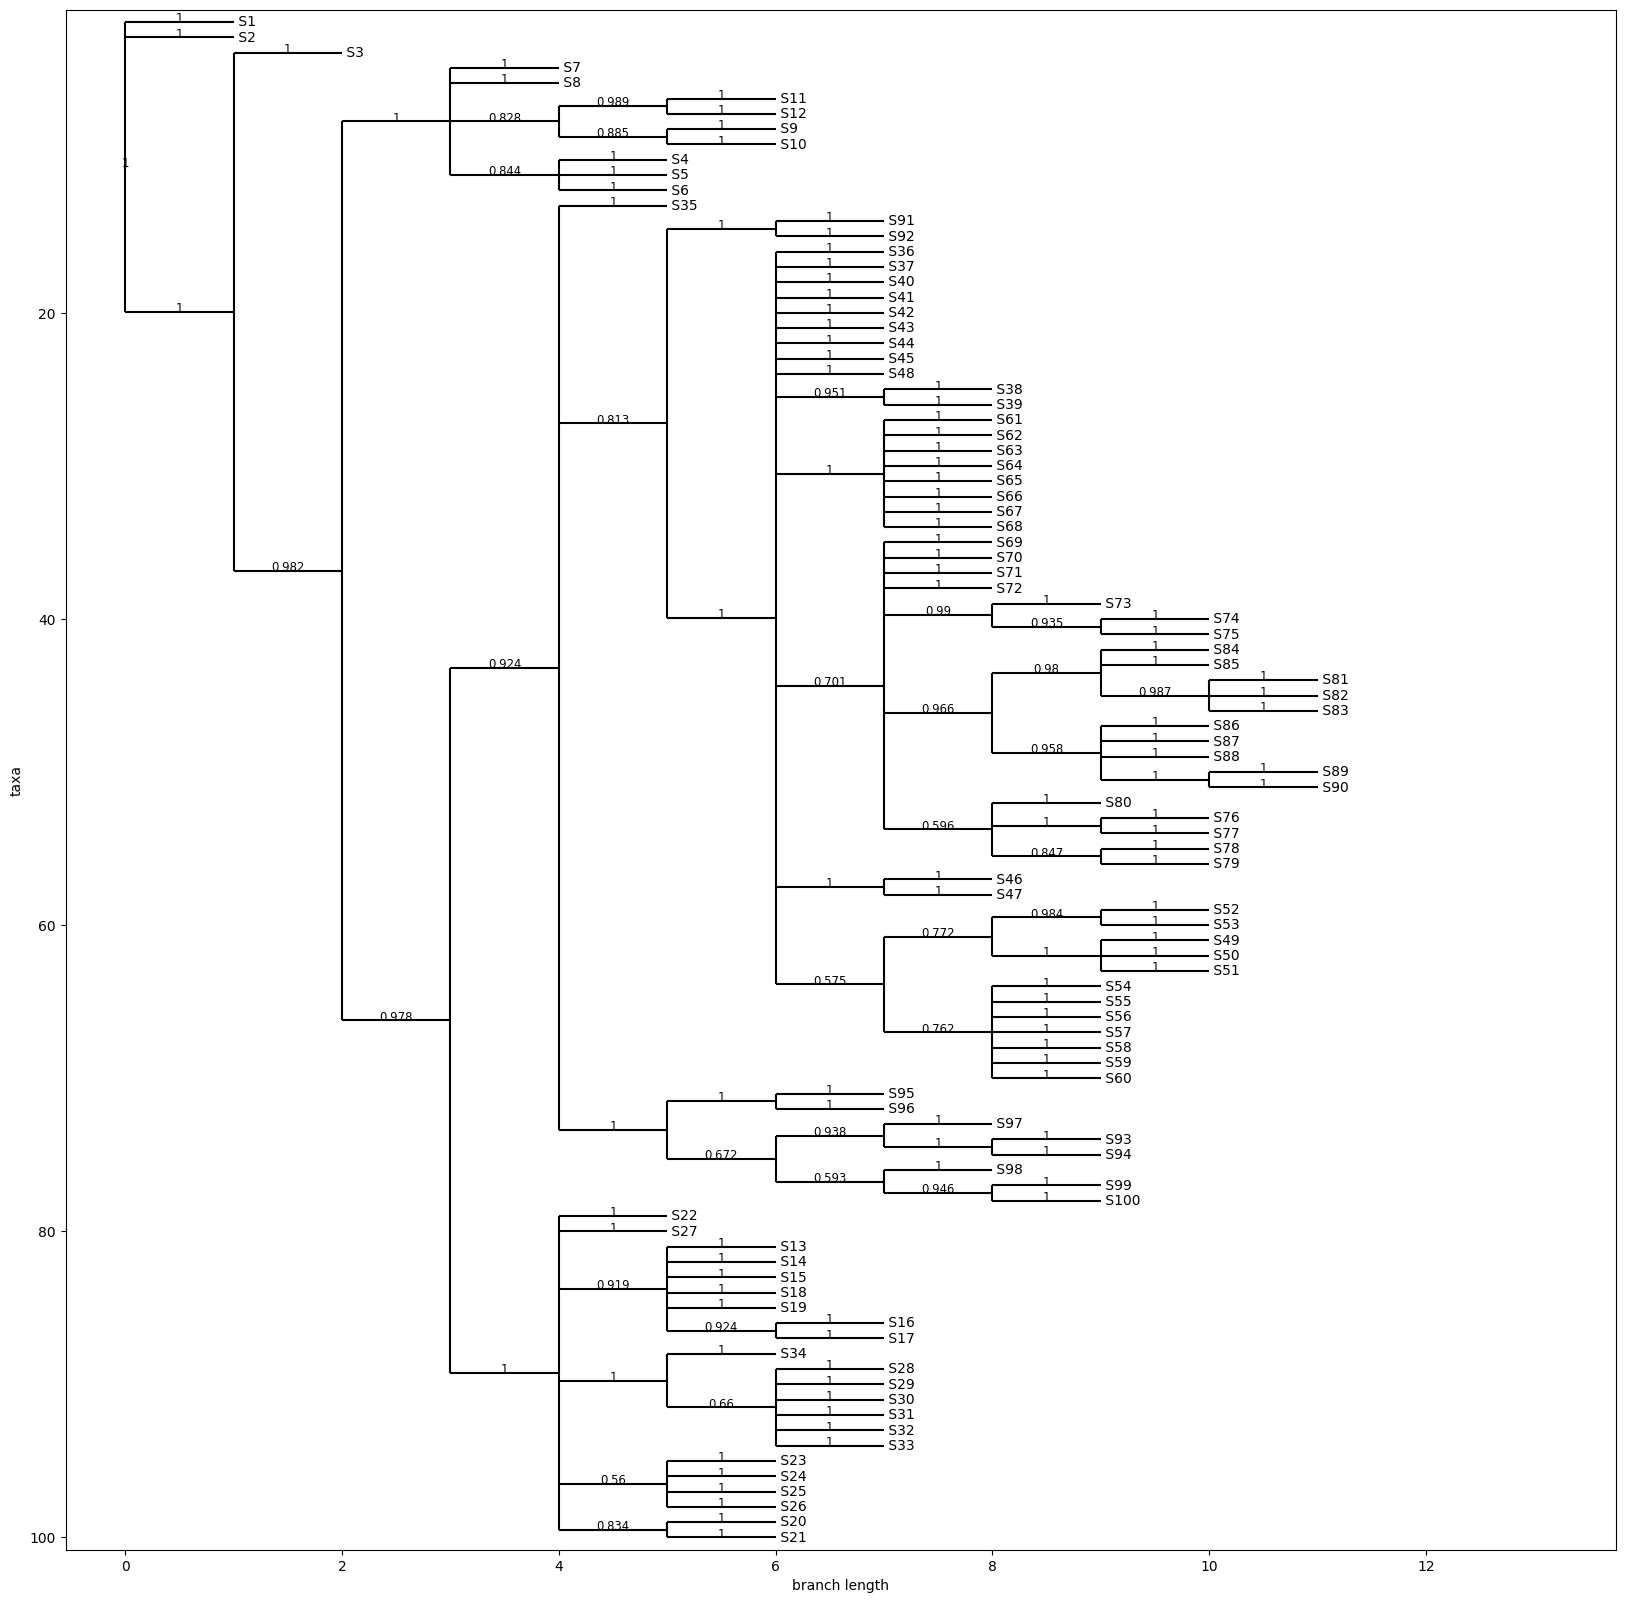

<Axes: xlabel='branch length', ylabel='taxa'>

In [9]:
# you can plot the consensus tree using Bio package
## plot with branch support (input trees might not be bootstrap trees so naming should be changed)
majority.plot_Bio(type="branch support", decimals=3)

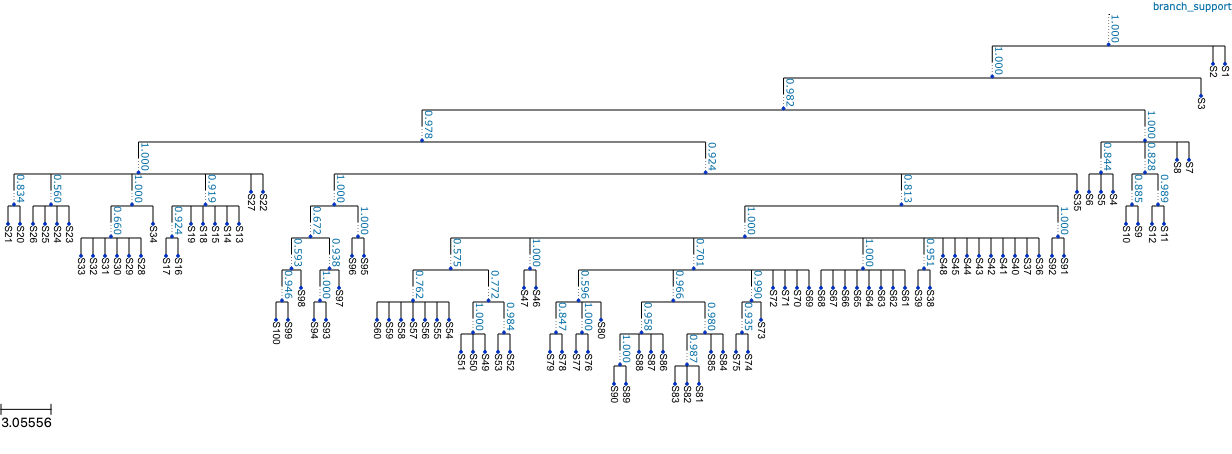

In [12]:
string=majority.as_string(schema='newick',suppress_rooting=True)
t = ete3.Tree(string)
ts=ete3.TreeStyle()
color = ["#006BA4", "#FF800E", "#ABABAB", "#595959",
                 "#5F9ED1", "#C85200", "#898989", "#A2C8EC", "#FFBC79", "#CFCFCF"]
_ = get_support(t,majority.taxon_namespace,majority.branch_support,pos = 0,leaf_support = False)
ts.legend.add_face(ete3.TextFace("branch_support",fgcolor=color[0]), column=0)
ts.rotation = 90
t.render(file_name="%%inline",tree_style=ts)

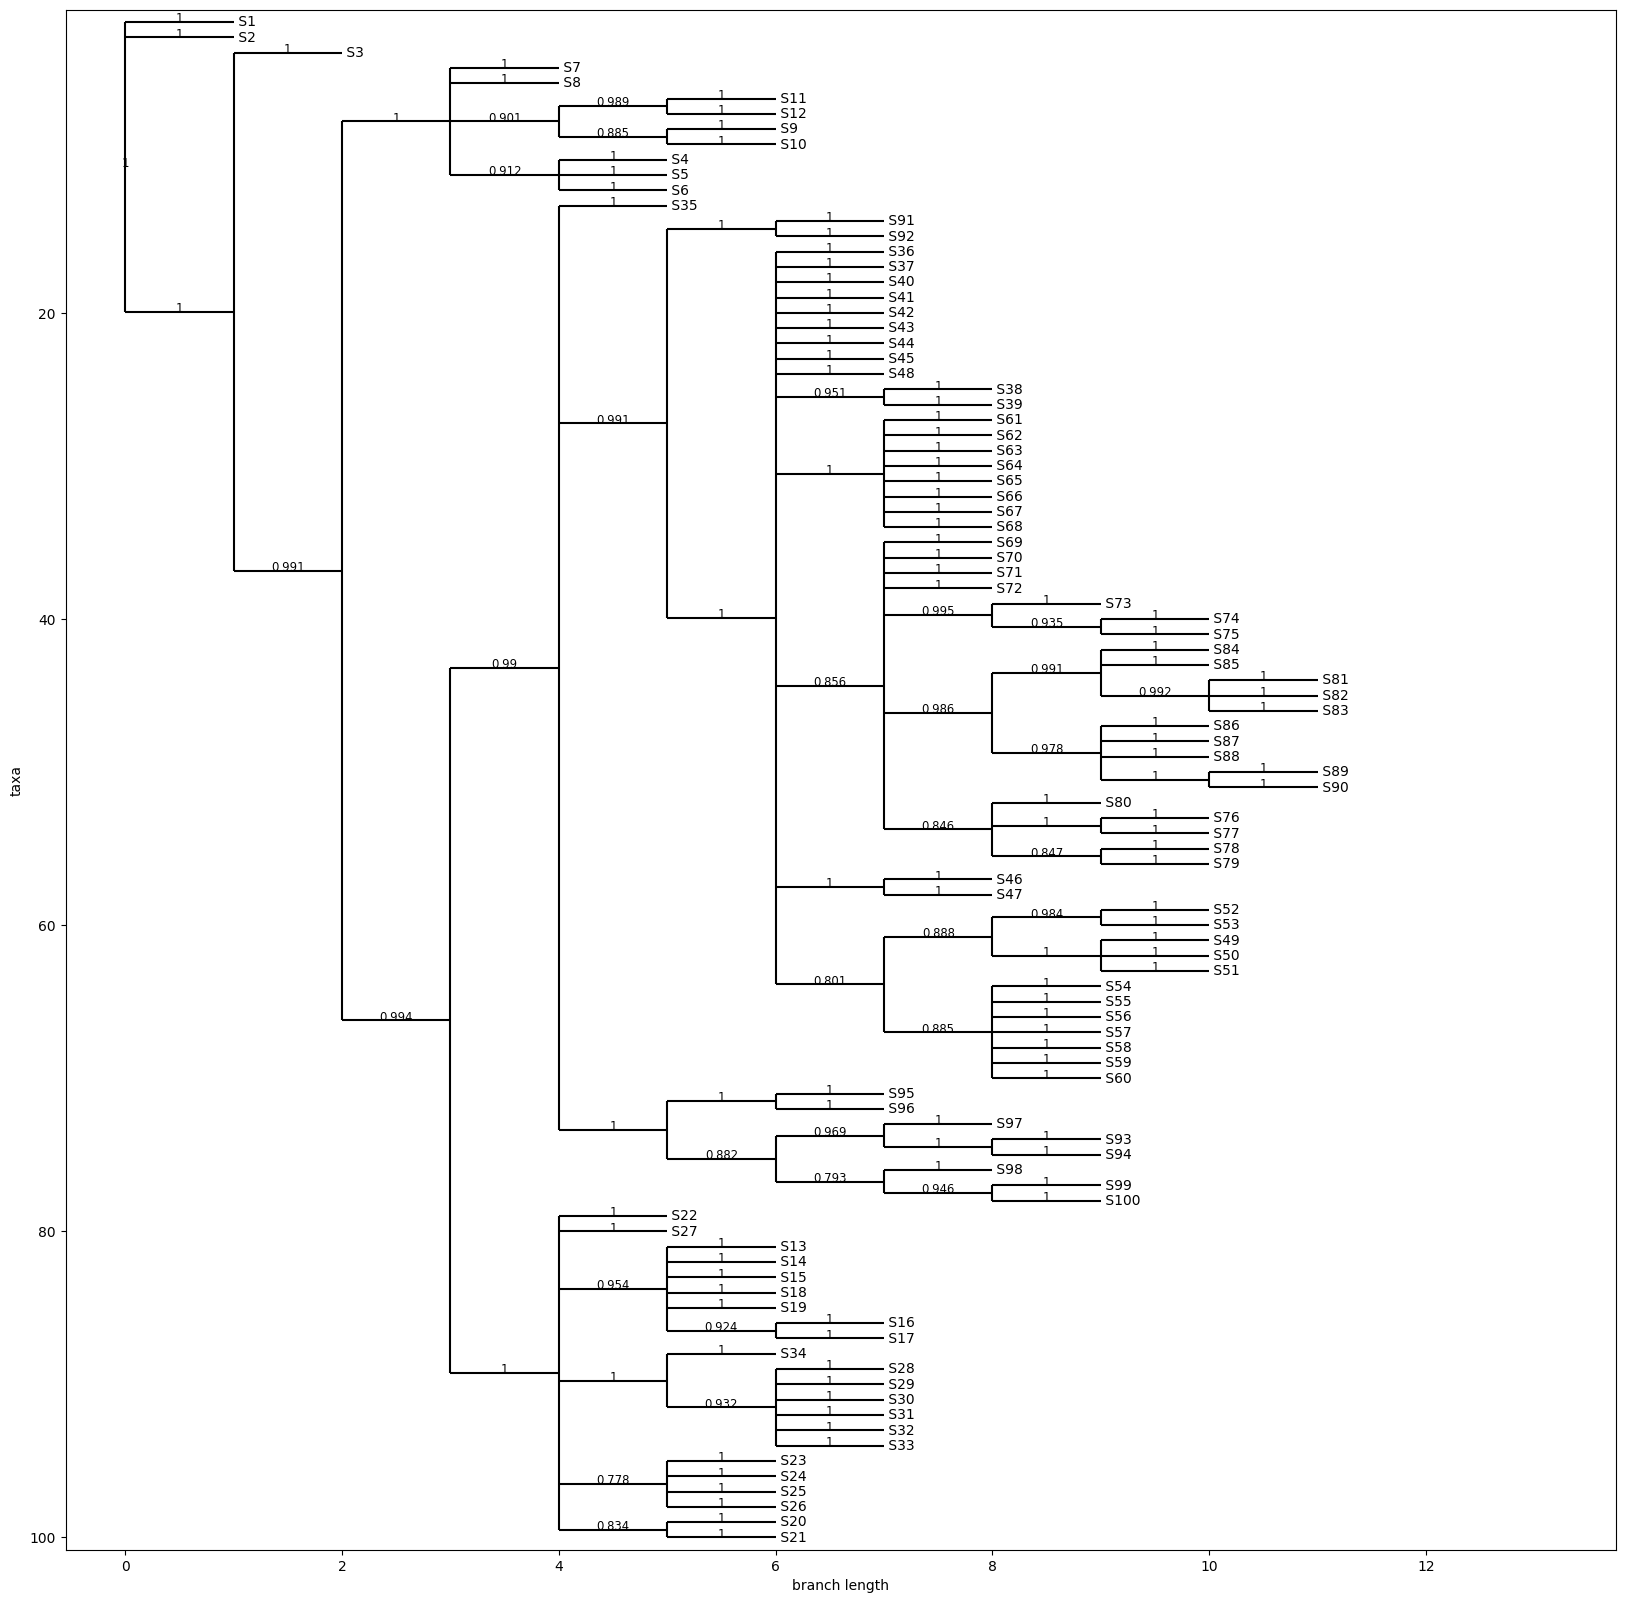

<Axes: xlabel='branch length', ylabel='taxa'>

In [12]:
# copmute transfer support and plot with it
majority.compute_transfer_support(treelist=input_trees)
majority.plot_Bio(type="transfer support", decimals=3)

In [11]:
## branch resolution and quartet resolution
## you need to instal 'tqdist' library to use quartet resoltion
print(majority.branch_resolution(), majority.quartet_resolution())

0.4639175257731959 0.799689892826859


In [12]:
# compute MAP tree
## this will return list of MAP trees and their frequency
MAP_list, freq = input_trees.MAP()

In [13]:
print(freq)
print(len(MAP_list)) # meaning all trees have different shapes

1
1000


## Pruning

### Pruning w.r.t. SBD loss

In [14]:
astral_bs = astral_tree.BS_prune(treelist=input_trees, threshold = 0.5)

### pruning w.r.t. std loss

In [15]:
# prune astral tree
astral_std = astral_tree.STD_greedy_pruning(input_trees, normalized=True)

computing transfer_support...
computing transfer_support for the other side...
current risk: 55784.98621452146
current risk: 55007.069547854786
current risk: 54259.48621452146
current risk: 53536.65288118813
current risk: 52819.15288118813
current risk: 52112.98621452146
current risk: 51425.319547854786
current risk: 50742.65288118812
current risk: 50070.65288118812
current risk: 49410.90288118812
current risk: 48756.069547854786
current risk: 48101.73621452146
current risk: 47452.23621452146
current risk: 46842.569547854786
current risk: 46249.73621452146
current risk: 45660.65288118813
current risk: 45078.28621452146
current risk: 44518.78621452146
current risk: 43988.03621452146
current risk: 43474.00288118812
current risk: 43000.00288118812
current risk: 42547.667802588534
current risk: 42120.04021378587
current risk: 41724.252118547774
current risk: 41330.41878521444
current risk: 40971.91878521444
current risk: 40618.25211854778
current risk: 40268.75211854778
current risk: 39938

In [16]:
print(astral_std.branch_resolution())

0.5051546391752577


### Pruning w.r.t. SUTD loss

In [17]:
# prune astral tree
astral_sutd = astral_tree.STD_greedy_pruning(input_trees, normalized=False)

computing transfer_support...
computing transfer_support for the other side...
current risk: 198586.0
current risk: 193637.0
current risk: 189384.0
current risk: 186641.0
current risk: 184047.0
current risk: 181701.0
current risk: 179537.0
current risk: 177485.0
current risk: 175687.0
current risk: 174053.0
current risk: 172506.0
current risk: 171085.0
current risk: 169665.0
current risk: 168330.0
current risk: 167007.0
current risk: 165792.0
current risk: 164757.0
current risk: 163971.0
current risk: 163188.0
current risk: 162436.0
current risk: 161713.0
current risk: 160999.0
current risk: 160424.0
current risk: 159853.0
current risk: 159304.0
current risk: 158761.0
current risk: 158246.0
current risk: 157751.0
current risk: 157274.0
current risk: 156802.0
current risk: 156331.0
current risk: 155863.0
current risk: 155398.0
current risk: 154937.0
current risk: 154519.0
current risk: 154120.0
current risk: 153722.0
current risk: 153334.0
current risk: 152949.0
current risk: 152579.0
c

### Pruning w.r.t. SQD loss
You need to install 'tqdist' library for this.

In [18]:
# prune astral tree
astral_sqd = astral_tree.SQD_greedy_pruning(input_trees)

iteration 1 time:  47.62902021408081  risk reduction:  16491020.0
iteration 2 time:  1.9661529064178467  risk reduction:  4037626.0
iteration 3 time:  1.863065242767334  risk reduction:  8027474.0
iteration 4 time:  2.3933329582214355  risk reduction:  3867864.0
iteration 5 time:  1.9400219917297363  risk reduction:  2643246.0
iteration 6 time:  2.377769947052002  risk reduction:  1858780.0
iteration 7 time:  1.4632201194763184  risk reduction:  1230528.0
iteration 8 time:  2.496896982192993  risk reduction:  530904.0
iteration 9 time:  1.8607077598571777  risk reduction:  311814.0
iteration 10 time:  1.462453842163086  risk reduction:  319410.0
iteration 11 time:  1.4251630306243896  risk reduction:  263304.0
iteration 12 time:  1.4664669036865234  risk reduction:  479434.0
iteration 13 time:  1.9077119827270508  risk reduction:  236326.0
iteration 14 time:  1.8206210136413574  risk reduction:  228096.0
iteration 15 time:  1.4279921054840088  risk reduction:  220972.0
iteration 16 tim

## Greedily Add & Remove Edges

### STDG

In [20]:
STDG = STDGreedyConsensus(input_trees)
STDG.specify_initial_tree(input_trees.majority_rule_consensus()) # starting from majority tree
STDG.greedy(method="first", order="BS")

Creating Bipartition List etc... time passed : 0.5904829502105713
Creating DIST... time passed : 57.761998891830444
time passed : 0.0004341602325439453
Creating TD... time passed : 14.14275574684143
branch added
branch added
branch added
branch added


In [23]:
current = STDG.return_current_tree()
print(current.branch_resolution())

0.5051546391752577


### SUTDG 

In [21]:
SUTDG = SUTDGreedyConsensus(input_trees)
SUTDG.specify_initial_tree(input_trees.majority_rule_consensus()) # starting from majority tree
SUTDG.greedy(method="first", order="BS")

Creating Bipartition List etc... time passed : 1.2438788414001465
Creating DIST... time passed : 58.38424801826477
time passed : 0.0004520416259765625
Creating UTD... time passed : 14.664899826049805
branch added
branch added
branch added
branch added
branch added


In [24]:
current = SUTDG.return_current_tree()
print(current.branch_resolution())

0.5154639175257731


### SQDG

In [22]:
SQDG = SQDGreedyConsensus(input_trees)
SQDG.specify_initial_tree(input_trees.majority_rule_consensus()) # starting from majority tree
SQDG.greedy(method="first", order="BS")

Creating Bipartition List etc... time passed : 0.5484638214111328
branch added, newcost: 846516530.0
branch added, newcost: 833109520.0
branch added, newcost: 831796754.0
branch added, newcost: 831026422.0
branch added, newcost: 813234610.0
branch added, newcost: 808557450.0


In [25]:
current = SQDG.return_current_tree()
print(current.branch_resolution())

0.5257731958762887
